1.1368683772161603e-15


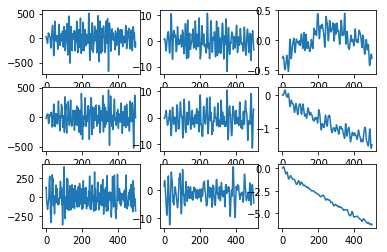

4.3655745685100556e-14


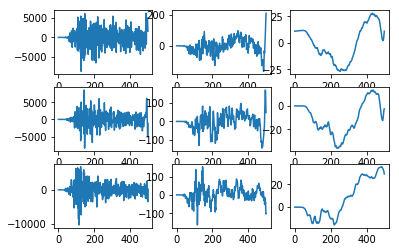

1.6370904631912707e-14


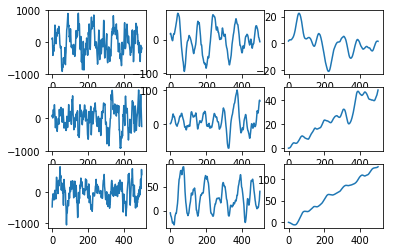

1.0459189070388675e-14


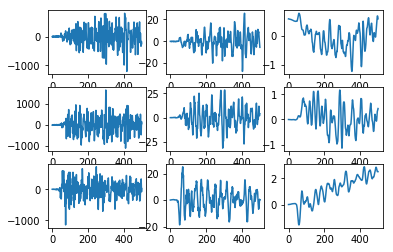

0.0


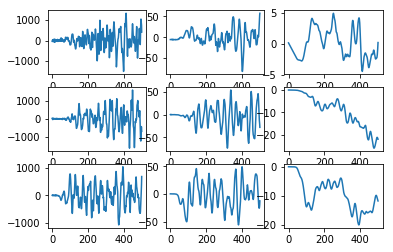

In [19]:
def sac_quad(data):
    quad_data = []
    quad_data.append(data[0]*0.01)
    lens = data.shape[0]
    for i in range(1, lens):
        quad_data.append(quad_data[-1] + data[i] *0.01)
    return np.array(quad_data)

from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

data = np.load('n_data.npy')
for i in range(370, 375):
    a = data[i,0,:,0]
    a = a - np.mean(a)
    print(np.mean(a))
    v = sac_quad(data[i,0,:,0])
    v = v - np.mean(v)
    m = sac_quad(v)
    m = m - np.mean(m)
    plt.subplot(331)
    plt.plot(data[i,0,:,0])
    plt.subplot(332)
    plt.plot(v)
    plt.subplot(333)
    plt.plot(m)
    
    
    v = sac_quad(data[i,0,:,1])
    m = sac_quad(v)
    plt.subplot(334)
    plt.plot(data[i,0,:,1])
    plt.subplot(335)
    plt.plot(v)
    plt.subplot(336)
    plt.plot(m)
    plt.subplot(337)
    
    v = sac_quad(data[i,0,:,2])
    m = sac_quad(v)
    plt.plot(data[i,0,:,2])
    plt.subplot(338)
    plt.plot(v)
    plt.subplot(339)
    plt.plot(m)
    plt.show()

1 Trace(s) in Stream:
BO.ABSH09..EW2 | 2017-04-30T14:42:56.000000Z - 2017-04-30T14:44:55.990000Z | 100.0 Hz, 12000 samples
1 Trace(s) in Stream:
BO.ABSH09..NS2 | 2017-04-30T14:42:56.000000Z - 2017-04-30T14:44:55.990000Z | 100.0 Hz, 12000 samples
1 Trace(s) in Stream:
BO.ABSH09..UD2 | 2017-04-30T14:42:56.000000Z - 2017-04-30T14:44:55.990000Z | 100.0 Hz, 12000 samples


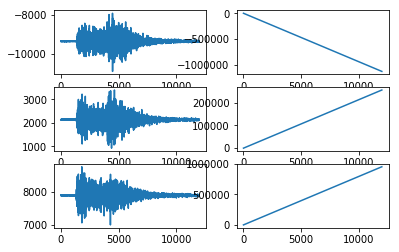

In [17]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(321)
sr = 'D:\ml_geophyscis\data\ABSH091704302342.EW2'
tempdata = read(sr)
print(tempdata)
plt.plot(tempdata[0].data)
plt.subplot(322)        
plt.plot(sac_quad(tempdata[0].data))
         
         
plt.subplot(323)
sr = 'D:\ml_geophyscis\data\ABSH091704302342.NS2'
tempdata = read(sr)
print(tempdata)
plt.plot(tempdata[0].data)
plt.subplot(324)        
plt.plot(sac_quad(tempdata[0].data))         
         
plt.subplot(325)
sr = 'D:\ml_geophyscis\data\ABSH091704302342.UD2'
tempdata = read(sr)
print(tempdata)
plt.plot(tempdata[0].data)
plt.subplot(326)        
plt.plot(sac_quad(tempdata[0].data))    
plt.show()

In [ ]:


def tao(sac_a_data, sac_v_data):
    mag = []
    v = sac_v_data[0]
    a = sac_a_data[0]
    alp = 0.999
    mag.append(2*np.sqrt(v/a)*3.14159)
    for i in range(1,sac_a_data.shape[0]):
        v = alp*v + sac_v_data[i]*sac_v_data[i]
        a = alp*a + sac_a_data[i]*sac_a_data[i]
        mag.append(2*np.sqrt(v/a)*3.14159)
    return mag

In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

t_len = 300
def taoc(data, t_len, index=0):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss

In [ ]:
data1 = np.load('n_data.npy')
data2 = np.load('n_data57.npy')
data = np.concatenate((data1, data2), axis=0)
label1 = np.load('n_magn.npy')
label2 = np.load('n_magn57.npy')
label = np.concatenate((label1, label2), axis=0)

f_threshold = np.where((label > 3.4)&(label < 5.8))
data = data[f_threshold[0]]
label = label[f_threshold[0]]
result = []

# q = taoc(data[1,:,:,0], t_len)
for i in range(len(label)):
    p1 = data[i,0,:,0]
    magn_t1, _  = taoc(p1, t_len)
    magn_t = magn_t1
    result.append(magn_t)

In [ ]:
np.abs(result-label).mean()

In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

def taoc(data, t_len, index=200):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss

data = np.load('data.npy')
magn = np.load('magn.npy')
taoc_data = []
t_len = 300
for i in range(len(magn)):
    p1 = data[i,0,:,0]
    p2 = data[i,0,:,1]
    p3 = data[i,0,:,2]
    _, fft_ss1  = taoc(p1, t_len)
    _, fft_ss2  = taoc(p2, t_len)
    _, fft_ss3  = taoc(p3, t_len)
    t_len = 300
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    taoc_data.append([fft_ss1, fft_ss2, fft_ss3])
taoc_data = np.transpose(taoc_data, [0, 2, 1])
print(taoc_data.shape)
np.save('taoc_data.npy', taoc_data)

In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

def taoc(data, t_len, index=0):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss

data = np.load('n_data.npy')
magn = np.load('n_magn.npy')
nn_taoc_data = []
t_len = 300
for i in range(len(magn)):
    p1 = data[i,0,:,0]
    p2 = data[i,0,:,1]
    p3 = data[i,0,:,2]
    _, fft_ss1  = taoc(p1, t_len)
    _, fft_ss2  = taoc(p2, t_len)
    _, fft_ss3  = taoc(p3, t_len)
    t_len = 300
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    temp = np.array([fft_ss3])
    temp = temp.reshape(149)
    nn_taoc_data.append(temp)
nn_taoc_data = np.array(nn_taoc_data)
print(nn_taoc_data.shape)
np.save('n_nn_taoc_dataud.npy', nn_taoc_data) 
np.save('w.npy', x)

In [ ]:
qqq= shock.train.inputs[np.where(p2 < 3.6)[0]]
for i in range(len(qqq)):
    plt.plot(qqq[i,:])

In [ ]:
w_index = np.where(y1<3.3)
r_index = np.where(y1>3.3)
plt.plot(y1[np.where(y1>3.3)], c='red', label='y')
plt.plot(p[np.where(y1>3.3)], c='black', label='prediction_y')
plt.ylabel(' magnitude')
plt.legend()

In [ ]:
plt.plot(y1[np.where(y1<3.3)], c='red', label='y')
plt.plot(p[np.where(y1<3.3)], c='black', label='prediction_y')
plt.ylabel(' magnitude')
plt.legend()

In [ ]:
plt.plot(y1, c='red', label='y')
plt.plot(p, c='black', label='prediction_y')
plt.ylabel(' magnitude')
plt.legend()

In [ ]:
sac = np.load('data.npy')
nn_taoc_data = np.load('nn_taoc_data.npy')
w = np.load('w.npy')

In [ ]:
for i in range(30,50):
    plt.figure(1)
    plt.subplot(221)
    plt.plot(sac[w_index[0][i],0,:,0])
    plt.subplot(222)
    plt.plot(sac[r_index[0][i],0,:,0])
    plt.show()

In [ ]:
np.abs(y1[w_index]-p[w_index]).mean()

In [ ]:
for i in range(70, 100):
    plt.figure(1)
    plt.subplot(221)
    plt.plot(nn_taoc_data[w_index[0][i],:]*w)
    plt.subplot(222)
    plt.plot(nn_taoc_data[r_index[0][i],:]*w)
    plt.show()

In [ ]:
import pandas as pd
a=np.random.random((3,3)) 
c = [str(i) for i in range(3)]
p = pd.DataFrame(data = a, columns=c)

In [ ]:
p.boxplot()

In [ ]:
from obspy import read
import numpy as np
import random
import os
from p_time import *
import matplotlib.pyplot as plt

def taoc(data, t_len, index=0):
    fft = np.abs(np.fft.fft(data[index:index+t_len]-data[index:index+t_len].mean()))
    fft = fft[:len(fft)/2]
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    fft_ss = fft[1:]/x/x
    sum1 = sum(x*x*fft_ss*fft_ss)
    sum2 = sum(fft_ss*fft_ss)
    mag = np.log(1/np.sqrt(sum1/sum2))/np.log(10)*3.373 + 5.78
    return mag, fft_ss

t_len = 300
data = np.load('n_data.npy')
magn = np.load('n_magn.npy')
n3_taoc_data = []
for i in range(len(magn)):
    p1 = data[i,0,:,0]
    p2 = data[i,0,:,1]
    p3 = data[i,0,:,2]
    _, fft_ss1  = taoc(p1, t_len)
    _, fft_ss2  = taoc(p2, t_len)
    _, fft_ss3  = taoc(p3, t_len)
    t_len = 300
    fft_ss_len = int(t_len/2-1)
    x = np.array(range(1,fft_ss_len+1))/fft_ss_len*100
    n3_taoc_data.append([fft_ss1, fft_ss2, fft_ss3])
n3_taoc_data = np.array(n3_taoc_data)
print(n3_taoc_data.shape)
np.save('n3_taoc_data.npy', n3_taoc_data)

In [ ]:
for i in range(1200, 1201):
    plt.figure(1)
    plt.subplot(311)
    plt.plot(n3_taoc_data[0, 0, :48]*x[0:48], color = 'r', linewidth = 2)
    plt.subplot(312)
    plt.plot(n3_taoc_data[0, 1, :48]*x[0:48], color = 'b', linewidth = 2)
    plt.subplot(313)
    plt.plot(n3_taoc_data[0, 2, :48]*x[0:48], color = 'g', linewidth = 2)
    plt.show()

In [2]:
label1 = np.load('n_magn.npy')
label2 = np.load('n_magn57.npy')
label = np.concatenate((label1, label2), axis=0)

In [4]:
data1 = np.load('n_nn_taoc_dataud.npy')
data2 = np.load('n_nn_taoc_data57ud.npy')
data = np.concatenate((data1, data2), axis=0)

In [5]:
print(data.shape)

(37382, 149)


In [ ]:
print(label.shape)